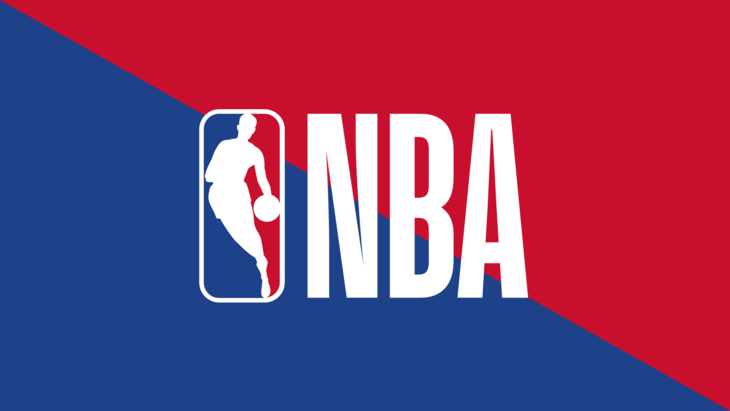

                        Link dos dados retirados da NBA: https://www.nba.com/stats/teams/traditional/

## EXTRAÇÃO DE DADOS

In [ ]:
""" Extração do dataset do site da NBA """

# importa-se o webdriver do Chrome da biblioteca Selenium; a biblioteca Pandas e o artifício BeautifulSoup da bib. bs4
from selenium.webdriver import Chrome
import pandas as pd
from bs4 import BeautifulSoup as soup

# O arquivo do webdriver é armazenado na variável web_scrap 
web_scrap = Chrome('C://Users//lordo//Documents//FEA.dev//projeto_nba//chromedriver.exe')

# A url a ser extraída é armazenada em na variável url
def nba(url, csv):
    """Função retorna """
    # Com a função get associada à variável web_scrap, o webdriver é capaz de acessar o link em que os dados serão extraídos 
    web_scrap.get(url)

    # Page_source possibilita que o selenium obtenha o código-fonte da página;
    #'html.parser' é a forma que vamos ler o dado e o soup facilita a navegação pelo html
    fonte_dados = soup(web_scrap.page_source, 'html.parser')

    # função find do selenium para achar o primeiro (e, no caso, único) elemento 'table' na página
    tabela_times = fonte_dados.find('table')

    # função find_all para achar todos os valores 'th' dentro do escopo da variável my_table_html, definida anteriormente
    colunas_html = tabela_times.find_all('th')

    # função find_all para achar todos os valores 'tr' dentro do escopo da variável my_table_html, definida anteriormente
    linhas_html = tabela_times.find_all('tr')

    # for loop para pegar o conteúdo de cada uma das 28 colunas 
    colunas = []
    for i in colunas_html[:28]:
        colunas.append(i.text)
    print(colunas)

    # for loop para pegarmos os dados da segunda linha em diante, uma vez que a primeira tem o nome de cada coluna
    dados = []
    for r in linhas_html[1:] :
        linhas_df = []
        #Para encontrar os 'td', que é o que armazena a linha no html
        valores = r.find_all('td')
        for valor in valores:
            linhas_df.append(valor.text.replace('\n', '').replace(' ', ''))
        dados.append(linhas_df)

    # A partir dos dados aferidos anteriormente, é possível montar o DataFrame
    df_nba = pd.DataFrame(columns = colunas, data = dados)

    # Abaixo, a função to_csv() irá transformar o DataFrame criado em um csv no local de origem do arquivo
    return df_nba.to_csv(csv)


nba('https://www.nba.com/stats/teams/traditional/?sort=TEAM_NAME&dir=1&Season=2018-19&SeasonType=Regular%20Season&PerMode=Totals', 'nba_2018_2019.csv')

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

file_names = ['nba_2010_2011.csv', 'nba_2011_2012.csv', 'nba_2012_2013.csv', 'nba_2013_2014.csv',
              'nba_2014_2015.csv', 'nba_2015_2016.csv', 'nba_2016_2017.csv', 'nba_2017_2018.csv',
              'nba_2018_2019.csv', 'nba_2019_2020.csv']

dataframes = [pd.read_csv(file).drop(columns=['Unnamed: 0', 'Unnamed: 1']) for file in file_names]
    
lista_de_times = [time for time in dataframes[9]['TEAM']]

dic_dfs = {2010: dataframes[0], 2011: dataframes[1], 2012: dataframes[2], 2013: dataframes[3], 2014: dataframes[4], 2015: dataframes[5], 2016: dataframes[6], 2017: dataframes[7], 2018: dataframes[8], 2019: dataframes[9]}

dic_dfs[2019]

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,WashingtonWizards,72,25,47,0.347,3471,8238,2990,6544,45.7,...,2295,3027,1801,1020,574,309,363,1634,1601,-336
1,UtahJazz,72,44,28,0.611,3471,8013,2886,6130,47.1,...,2577,3233,1615,1089,438,292,329,1468,1501,178
2,TorontoRaptors,72,53,19,0.736,3476,8118,2897,6331,45.8,...,2583,3268,1816,1067,636,358,395,1559,1466,449
3,SanAntonioSpurs,71,32,39,0.451,3443,8098,2995,6350,47.2,...,2530,3170,1751,895,518,390,308,1377,1424,-79
4,SacramentoKings,72,31,41,0.431,3491,7927,2943,6364,46.2,...,2372,3067,1713,1043,556,293,304,1595,1404,-147
5,PortlandTrailBlazers,74,35,39,0.473,3567,8508,3122,6749,46.3,...,2599,3353,1525,946,465,451,364,1606,1488,-85
6,PhoenixSuns,73,34,39,0.466,3519,8294,3006,6429,46.8,...,2465,3177,1987,1077,559,290,401,1609,1653,16
7,Philadelphia76ers,73,43,30,0.589,3519,8084,3000,6417,46.8,...,2553,3317,1884,1037,586,389,294,1529,1493,174
8,OrlandoMagic,73,33,40,0.452,3514,7831,2871,6468,44.4,...,2498,3249,1747,937,599,396,338,1336,1420,-74
9,OklahomaCityThunder,72,44,28,0.611,3486,7950,2879,6156,46.8,...,2495,3088,1562,986,550,353,290,1390,1641,143


### FUNÇÃO DE ORDENAÇÃO DOS DADOS DAS COLUNAS DO DATAFRAME


In [3]:
""" A FUNÇÃO ORDENA OS DADOS DE UMA COLUNA DE MODO CRESCENTE OU DECRESCENTE: 
    
    Args:
        temporada (str): a temporada escolhida para ordenação;
        coluna (str): a coluna (critério) pelo qual se quer ordenar;
        ordem (str): 'C' para crescente e 'D' para decrescente. OBS: está pré-setado para 'D'
    
    Returns:
        Se ordem == 'C', return dataframe_ordenado_crescente, com os dados ordenados de forma crescente
        Se ordem == 'D', return dataframe_ordenado_decrescente, com os dados ordenados de forma decrescente
        Se a ordem for igual a qualquer outro elemento, retorn ValueError
    """

def ordenar_DataFrame(temporada, coluna, ordem):
    
    # usa-se a função sort_values sobre a temporada selecionada, em ordem crescente
    if ordem == 'C':
        dataframe_ordenado_crescente = dic_dfs[temporada].sort_values(by=coluna, ascending=True)
        return dataframe_ordenado_crescente
    
    # usa-se a função sort_values sobre a temporada selecionada, em ordem decrescente
    elif ordem == 'D':
        dataframe_ordenado_decrescente = dic_dfs[temporada].sort_values(by=coluna, ascending=False)
        return dataframe_ordenado_decrescente
    
    else:
        raise ValueError('Você colocou um argumento inválido para a ordem!')

ordenar_DataFrame(2014, 'PTS', 'C')

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
10,NewYorkKnicks,82,17,65,0.207,3971,7535,2882,6726,42.8,...,2443,3310,1746,1206,575,382,353,1768,1564,-764
7,Philadelphia76ers,82,18,64,0.220,3961,7542,2765,6777,40.8,...,2536,3514,1683,1453,789,487,454,1778,1657,-736
26,CharlotteHornets,82,33,49,0.402,3981,7721,2913,6932,42.0,...,2793,3613,1654,976,499,448,440,1494,1708,-260
14,MiamiHeat,82,37,45,0.451,3946,7764,2885,6330,45.6,...,2461,3208,1626,1214,642,372,359,1636,1715,-213
1,UtahJazz,82,38,44,0.463,3941,7801,2900,6492,44.7,...,2617,3605,1632,1256,623,489,382,1583,1604,18
8,OrlandoMagic,82,25,57,0.305,3951,7847,3076,6792,45.3,...,2607,3429,1692,1221,647,314,441,1714,1467,-469
18,IndianaPacers,82,38,44,0.463,3971,7981,2998,6824,43.9,...,2822,3678,1757,1147,505,375,386,1742,1754,23
12,MinnesotaTimberwolves,82,16,66,0.195,3961,8016,2986,6820,43.8,...,2406,3355,1771,1231,668,327,449,1571,1751,-721
13,MilwaukeeBucks,82,41,41,0.500,3986,8023,3083,6722,45.9,...,2574,3450,1932,1373,789,403,392,1814,1649,35
27,BrooklynNets,82,38,44,0.463,3986,8038,3069,6804,45.1,...,2627,3473,1716,1133,576,340,372,1579,1641,-236


### FUNÇÃO QUE RETORNA A SOMA DE UM CRITÉRIO TODOS OS ANOS, E O TOTAL DESSE CRITÉRIO NOS 10 ULTIMOS ANOS

In [6]:
df_sum = pd.DataFrame({})

def funcao_x(col):
    
    """ A FUNÇÃO RETORNA O TOTAL DE UMA COLUNA NAS 10 TEMPORADAS, E A SOMA DESSA COLUNA

    Args:
        coluna(str): coluna do conjunto de DataFrames que se deseja obter

    Returns: 
        A soma da coluna e um DataFrame contendo a soma da coluna em cada temporada.
    """
    
    lista_parametro = [season[col].sum() for season in dataframes]
    
    global df_sum
    df_sum = pd.DataFrame({'Temporadas': range(2010, 2020),
                           'Total de {} por temporada'.format(col): lista_parametro})
    
    print(f'O total de {col} foi de {sum(lista_parametro)} nas últimas dez temporadas.')
    
    return df_sum.set_index('Temporadas')

col = 'PF'
funcao_x(col)

O total de PF foi de 482192 nas últimas dez temporadas.


,Total de PF por temporada
Temporadas,
2010,50953
2011,38744
2012,48775
2013,50923
2014,49728
2015,49854
2016,48950
2017,48837
2018,51424


#### A PARTIR DOS DADOS AFERIDOS NA FUNÇÃO ANTERIOR, É POSSÍVEL MONTAR UM GRÁFICO COM OS DADOS PARA OBSERVAR TENDÊNCIAS

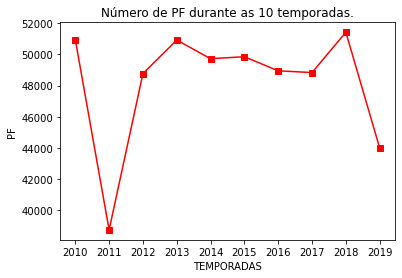

In [7]:
# GRÁFICO PARA OBSERVAR TENDÊNCIAS AO LONGO DO TEMPO
plt.plot(df_sum.iloc[:, 1], color='r', marker='s')
plt.xlabel('TEMPORADAS')
plt.ylabel(f'{col}')
plt.title(f'Número de {col} durante as 10 temporadas.')
xticks = range(0, 10)
new_xticks = range(2010, 2020)
plt.xticks(xticks, new_xticks)
plt.show()

### TIME MAIS VITORIOSO, MAIOR PONTUADOR, QUE MAIS FEZ FALTAS....

In [11]:
def func(criterio):
    """A FUNÇÃO RETORNA O TIME QUE MAIS FEZ ALGUM CRITERIO DURANTE AS 10 TEMPORADAS
    
    Arg:
        criterio(str): criterio pelo qual se quer obter o time que mais o fez durante as 10 temporadas
    
    Returns:
        DataFrame contendo o valor máximo que um time obteve do critério especificado e o próprio time.
    """
    
    soma_new_lista = sum([season[criterio] for season in dataframes])
    
    df_soma_new_lista = pd.DataFrame({"TEAM": lista_de_times,
                                      criterio: soma_new_lista})
    
    time_valor =  df_soma_new_lista[df_soma_new_lista[criterio].isin([soma_new_lista.max()])]
    
    return time_valor

func('PF')

,TEAM,PF
6,PhoenixSuns,17365


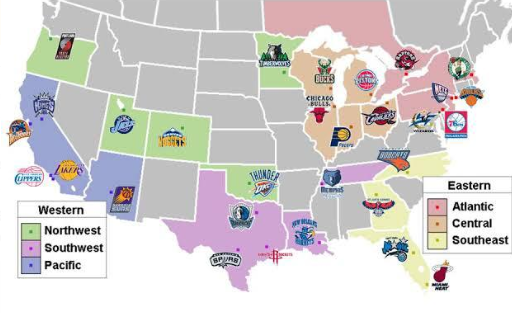

### DATAFRAME COM ALGUMAS MÉTRICAS GERAIS...


In [12]:
equipes_leste = ['AtlantaHawks', 'BostonCeltics', 'BrooklynNets', 'CharlotteHornets', 'ChicagoBulls', 
                 'ClevelandCavaliers', 'DetroitPistons', 'IndianaPacers', 'MiamiHeat', 'MilwaukeeBucks', 
                 'NewYorkKnicks', 'OrlandoMagic', 'Philadelphia76ers', 'TorontoRaptors', 
                 'WashingtonWizards']

conferencia = []
for time in lista_de_times:
    if time in equipes_leste:
        conferencia.append('Leste')
    else:
        conferencia.append('Oeste')

dataframe_geral = pd.DataFrame({'Time': [i for i in lista_de_times],
                                'Pontos': [i for i in sum([c['PTS'] for c in dataframes])],
                                'Vitórias': [i for i in sum([i['W'] for i in dataframes])],
                                'Derrotas': [i for i in sum([i['L'] for i in dataframes])],
                                'Minutos': [i for i in sum([i['MIN'] for i in dataframes])],
                                'Cestas de 3 pontos': [i for i in sum([i['3PM'] for i in dataframes])],
                                'Faltas': [i for i in sum([i['PF'] for i in dataframes])],
                                'Conferência' : [i for i in conferencia]})
dataframe_geral

,Time,Pontos,Vitórias,Derrotas,Minutos,Cestas de 3 pontos,Faltas,Conferência
0,WashingtonWizards,81952,352,442,38482,6498,16852,Leste
1,UtahJazz,80342,414,380,38397,6696,16342,Oeste
2,TorontoRaptors,82755,453,341,38437,7131,17153,Leste
3,SanAntonioSpurs,83696,541,252,38314,6866,14388,Oeste
4,SacramentoKings,82003,293,501,38382,6377,16682,Oeste
5,PortlandTrailBlazers,83532,436,360,38503,7663,15816,Oeste
6,PhoenixSuns,82667,306,489,38400,6825,17365,Oeste
7,Philadelphia76ers,80557,331,464,38415,6812,16534,Leste
8,OrlandoMagic,79596,321,474,38415,6988,15517,Leste
9,OklahomaCityThunder,85256,509,285,38442,6806,16817,Oeste


#### GRÁFICO DE DISPERSÃO COM RETA DE REGRESSÃO

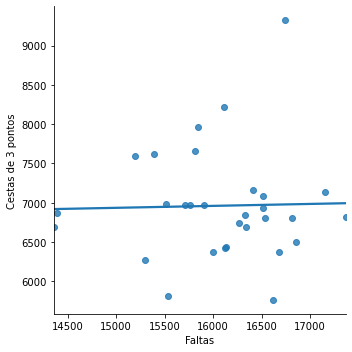

In [15]:
def funcao_tips_1(arg_1, arg_2):
    
    """ A FUNÇÃO RETORNA UM GRÁFICO DE DISPERSÃO QUE RELACIONA DIFERENTES VARIÁVEIS DO DATAFRAME E
        UMA RETA DE REGRESSÃO
    
    Args: 
        arg_1 (str): Coluna selecionada para o eixo X
        arg_2 (str): Coluna selecionada para o eixo Y
        
    Returns:
        Um gráfico de dispersão com as respectivas colunas nos eixos x e y
    """
    tips = sns.lmplot(data=dataframe_geral, x=arg_1, y=arg_2, ci=None)
    
    return tips

funcao_tips_1('Faltas', 'Cestas de 3 pontos')

#### GRÁFICO DE DISPERSÃO COM HUE POR CONFERÊNCIA

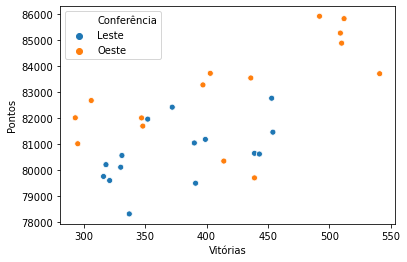

In [16]:
def funcao_tips(arg_1, arg_2, arg_3=None):

    """ A FUNÇÃO RETORNA UM GRÁFICO DE DISPERSÃO QUE RELACIOONA DIFERENTES VARIÁVEIS DO DATAFRAME
    
    Args: 
        arg_1 (str): Coluna selecionada para o eixo X
        arg_2 (str): Coluna selecionada para o eixo Y
        arg_3 (str): Coluna selecionada para o hue
    Returns:
        Um gráfico de dispersão com as respectivas colunas nos eixos x e y
    """
    
    graf_disp = sns.scatterplot(data=dataframe_geral, x=arg_1, y=arg_2, hue=arg_3)
    
    return graf_disp

funcao_tips('Vitórias', 'Pontos', 'Conferência')

# Função que mostra o desempenho do time ao longo das 10 temporadas


In [17]:
def desemp_time(time, criterio):
    """ Somente leva a variável time
    Vamos iterar ao longo das seasons para descobrir qual o desempenho da equipe 
    Return: gráfico linear com o desempenho ao longo dos anos 
    """
    desempenho = []
    for season in dataframes:
        desemp1 = season[['TEAM', criterio]].loc[season['TEAM'] == time][criterio].values[0]
        desempenho.append(desemp1)
        #print (desempenho)
        
    xticks = [num for num in range(0, 10)]
    new_xticks = [ano for ano in range(2010, 2020)]
    plt.xticks(xticks, new_xticks)
    plot_desempenho = plt.plot (desempenho, color='black', marker='s')    
    return plot_desempenho   

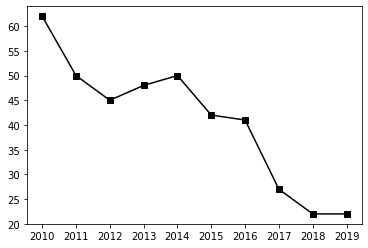

In [19]:
desemp_time('ChicagoBulls', 'W')

# Nova coluna que nos diz de qual conferência o time pertence


In [20]:
def define_conf (nome_time) :
    
    equipes_oeste = ['LosAngelesLakers', 'GoldenStateWarriors', 'SanAntonioSpurs', 'HoustonRockets', 'OklahomaCityThunder', 
                     'PortlandTrailBlazers', 'DallasMavericks', 'PhoenixSuns', 'UtahJazz', 'SacramentoKings', 'LAClippers',
                     'MemphisGrizzlies', 'DenverNuggets', 'MinnesotaTimberwolves', 'NewOrleansPelicans']
 
    if nome_time in equipes_oeste :
        return 'oeste'
    else :
        return 'leste' 
        

define_conf ('TorontoRaptors')

'leste'

In [21]:
for i in dataframes:
    i['CONFERENCIA'] = list(map(define_conf, i['TEAM']))

# Função que analisa desempenho por temporada


In [22]:
dic_dfs[2019].head(10)

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,CONFERENCIA
0,WashingtonWizards,72,25,47,0.347,3471,8238,2990,6544,45.7,...,3027,1801,1020,574,309,363,1634,1601,-336,leste
1,UtahJazz,72,44,28,0.611,3471,8013,2886,6130,47.1,...,3233,1615,1089,438,292,329,1468,1501,178,oeste
2,TorontoRaptors,72,53,19,0.736,3476,8118,2897,6331,45.8,...,3268,1816,1067,636,358,395,1559,1466,449,leste
3,SanAntonioSpurs,71,32,39,0.451,3443,8098,2995,6350,47.2,...,3170,1751,895,518,390,308,1377,1424,-79,oeste
4,SacramentoKings,72,31,41,0.431,3491,7927,2943,6364,46.2,...,3067,1713,1043,556,293,304,1595,1404,-147,oeste
5,PortlandTrailBlazers,74,35,39,0.473,3567,8508,3122,6749,46.3,...,3353,1525,946,465,451,364,1606,1488,-85,oeste
6,PhoenixSuns,73,34,39,0.466,3519,8294,3006,6429,46.8,...,3177,1987,1077,559,290,401,1609,1653,16,oeste
7,Philadelphia76ers,73,43,30,0.589,3519,8084,3000,6417,46.8,...,3317,1884,1037,586,389,294,1529,1493,174,leste
8,OrlandoMagic,73,33,40,0.452,3514,7831,2871,6468,44.4,...,3249,1747,937,599,396,338,1336,1420,-74,leste
9,OklahomaCityThunder,72,44,28,0.611,3486,7950,2879,6156,46.8,...,3088,1562,986,550,353,290,1390,1641,143,oeste


In [23]:
def desemp_por_conferencia (season, criterio):
    desemp = dic_dfs[season][['CONFERENCIA', criterio]].groupby ('CONFERENCIA')[criterio].sum ()
    return desemp.plot.bar()

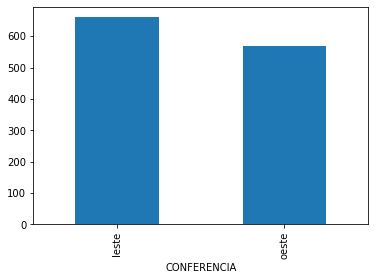

In [24]:
desemp_por_conferencia (2012, 'W')

In [25]:
def desemp_total_por_conferencia (criterio) :
    conf_oeste = []
    conf_leste = []
    temp_season = []
    
    for season in range (2010,2020):
        desemp2 = dic_dfs[season][['CONFERENCIA', criterio]].groupby ('CONFERENCIA').sum ().values
        conf_oeste.append (desemp2 [1][0])
        conf_leste.append (desemp2 [0][0])
        temp_season.append (season)
    plt.xlabel ('Season')
    plt.ylabel (criterio)
    plt.plot (temp_season, conf_oeste, color = 'red', marker = 's')
    plt.plot (temp_season, conf_leste, color = 'black', marker = 's')
    plt.legend (['oeste', 'leste'], loc = 'upper left') 
    
    return plt.show()

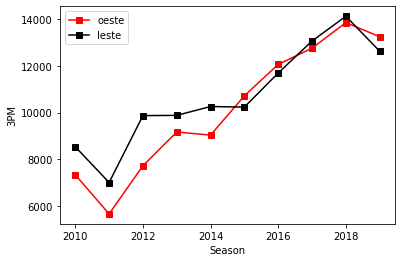

In [27]:
desemp_total_por_conferencia('3PM')